In [ ]:
/import kagglehub
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
path = kagglehub.dataset_download("vishesh1412/celebrity-face-image-dataset")

# Define dataset path
dataset_folder = os.path.join(path, "Celebrity Faces Dataset")

# Function to load data
def load_data_from_folder(folder_path, image_size):
    data = []
    labels = []
    classes = []

    for idx, class_dir in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_dir)
        if os.path.isdir(class_path):
            classes.append(class_dir)
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                try:
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=image_size)
                    img_array = tf.keras.preprocessing.image.img_to_array(img)
                    data.append(img_array)
                    labels.append(idx)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

    data = np.array(data, dtype='float32') / 255.0
    labels = np.array(labels)
    return data, labels, classes


100%|██████████| 52.9M/52.9M [00:00<00:00, 62.0MB/s]

Extracting files...


In [ ]:

# Load data
image_size = (128, 128)
data, labels, classes = load_data_from_folder(dataset_folder, image_size)

# Feature extraction using VGG16
feature_extractor = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
feature_extractor.trainable = False
features = feature_extractor.predict(data, batch_size=32, verbose=1)
features = features.reshape(features.shape[0], -1)

# Shuffle and split data
data, labels = shuffle(features, labels, random_state=42)
split_idx = int(0.8 * len(data))
train_data, val_data = data[:split_idx], data[split_idx:]
train_labels, val_labels = labels[:split_idx], labels[split_idx:]

# Create generators
train_generator = tf.data.Dataset.from_tensor_slices((train_data, train_labels)).batch(32).shuffle(len(train_data))
val_generator = tf.data.Dataset.from_tensor_slices((val_data, val_labels)).batch(32)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step


In [ ]:
# Build model
input_shape = (features.shape[1],)
num_classes = len(classes)
model = Sequential([
    Dense(128, activation='relu', input_shape=input_shape),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train model
epochs = 20
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.0881 - loss: 2.9684 - val_accuracy: 0.1917 - val_loss: 2.6809
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1379 - loss: 2.6202 - val_accuracy: 0.1944 - val_loss: 2.4279
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1913 - loss: 2.3986 - val_accuracy: 0.2417 - val_loss: 2.2878
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2407 - loss: 2.2514 - val_accuracy: 0.3111 - val_loss: 2.2026
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2455 - loss: 2.1896 - val_accuracy: 0.2694 - val_loss: 2.1296
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2896 - loss: 2.0967 - val_accuracy: 0.2917 - val_loss: 2.0971
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3059 - loss: 2.0430 - val_accuracy: 0.3528 - val_loss: 2.0276
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3208 - loss: 1.9585 - val_accuracy: 0.3694 - val_loss

In [ ]:
def plot_training_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

Class Indices: {0: 'Jennifer Lawrence', 1: 'Tom Cruise', 2: 'Angelina Jolie', 3: 'Hugh Jackman', 4: 'Megan Fox', 5: 'Johnny Depp', 6: 'Natalie Portman', 7: 'Brad Pitt', 8: 'Nicole Kidman', 9: 'Tom Hanks', 10: 'Denzel Washington', 11: 'Robert Downey Jr', 12: 'Scarlett Johansson', 13: 'Leonardo DiCaprio', 14: 'Kate Winslet', 15: 'Sandra Bullock', 16: 'Will Smith'}


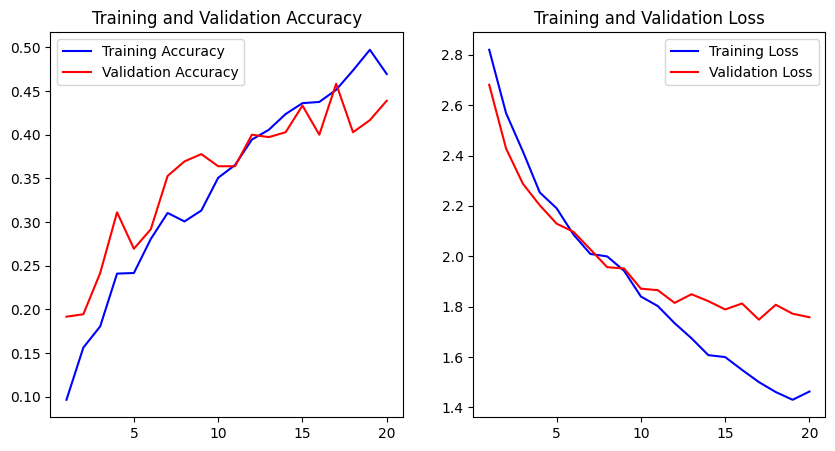

In [ ]:
print("Class Indices:", {i: c for i, c in enumerate(classes)})
plot_training_results(history)

In [ ]:
model.save("image_classifier.h5")  # Save the model
print("Model saved successfully!")

Model saved successfully!


In [ ]:
print(model.input_shape)


(None, 8192)


In [ ]:
print("Model Input Shape:", model.input_shape)


Model Input Shape: (None, 8192)


In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model("image_classifier.h5")
print("Model loaded successfully!")

# Load and preprocess the image
image_path = "test1.jpg"
img = cv2.imread(image_path)

if img is None:
    print("Error: Image not found!")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # ✅ Resize so that when flattened, it has 8192 features
    img = cv2.resize(img, (64, 128))  # 64 * 128 * 1 = 8192
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    img = img / 255.0  # Normalize pixel values

    img = img.flatten()  # Flatten the image to a 1D array of size 8192
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Check final shape
    print("Processed Image Shape:", img.shape)  # Should be (1, 8192)

    # Make a prediction
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)

    # Display the image and prediction
    plt.imshow(cv2.imread(image_path))
    plt.axis("off")
    plt.title(f"Predicted Class: {predicted_class[0]}")
    plt.show()


Model loaded successfully!
Error: Image not found!


57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step
Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.0850 - loss: 3.0845 - val_accuracy: 0.1694 - val_loss: 2.6458
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1433 - loss: 2.6189 - val_accuracy: 0.2139 - val_loss: 2.5002
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2103 - loss: 2.4580 - val_accuracy: 0.2194 - val_loss: 2.3273
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2339 - loss: 2.2889 - val_accuracy: 0.2694 - val_loss: 2.2783
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2377 - loss: 2.2179 - val_accuracy: 0.2722 - val_loss: 2.1650
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2971 - loss: 2.0572 - val_accuracy: 0.3278 - val_loss: 2.0985
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2929 - loss: 1.9327 - val_accuracy: 0.3361 - val_loss: 2.0603
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3350 - loss: 

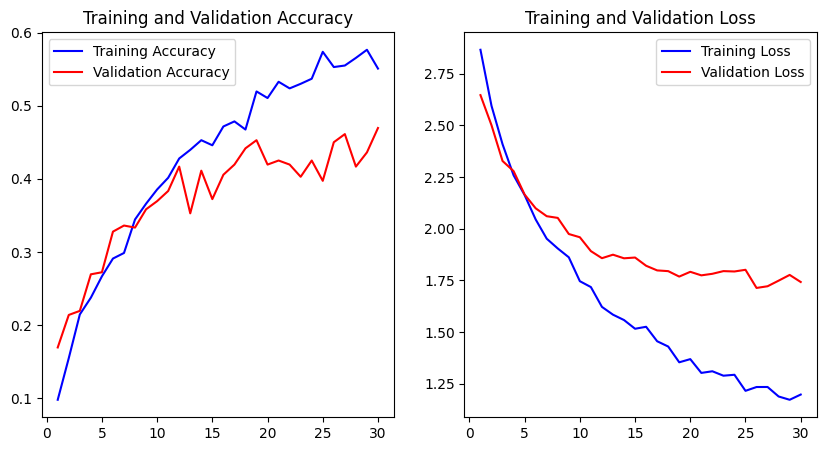

In [ ]:
import kagglehub
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.applications import VGG16
from sklearn.utils import shuffle

# Download dataset
path = kagglehub.dataset_download("vishesh1412/celebrity-face-image-dataset")
dataset_folder = os.path.join(path, "Celebrity Faces Dataset")

# Function to load dataset
def load_data_from_folder(folder_path, image_size):
    data = []
    labels = []
    classes = []

    for idx, class_dir in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_dir)
        if os.path.isdir(class_path):
            classes.append(class_dir)
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                try:
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=image_size)
                    img_array = tf.keras.preprocessing.image.img_to_array(img)
                    data.append(img_array)
                    labels.append(idx)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

    data = np.array(data, dtype='float32') / 255.0
    labels = np.array(labels)
    return data, labels, classes

# Load data
image_size = (128, 128)
data, labels, classes = load_data_from_folder(dataset_folder, image_size)

# Feature extraction using VGG16
feature_extractor = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
feature_extractor.trainable = False
features = feature_extractor.predict(data, batch_size=32, verbose=1)
features = features.reshape(features.shape[0], -1)

# Shuffle and split data
data, labels = shuffle(features, labels, random_state=42)
split_idx = int(0.8 * len(data))
train_data, val_data = data[:split_idx], data[split_idx:]
train_labels, val_labels = labels[:split_idx], labels[split_idx:]

# Create generators
train_generator = tf.data.Dataset.from_tensor_slices((train_data, train_labels)).batch(32).shuffle(len(train_data))
val_generator = tf.data.Dataset.from_tensor_slices((val_data, val_labels)).batch(32)

# Build model
input_shape = (features.shape[1],)
num_classes = len(classes)
model = Sequential([
    Dense(128, activation='relu', input_shape=input_shape),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
epochs = 30
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

# Plot training results
def plot_training_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

print("Class Indices:", {i: c for i, c in enumerate(classes)})
plot_training_results(history)

# Save model
model.save("celebrity_face_classifier.h5")


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load trained model and class names
model = tf.keras.models.load_model("celebrity_face_classifier.h5")  # Update with your model path
classes = [
    "Angelina Jolie", "Brad Pitt", "Denzel Washington", "Hugh Jackman",
    "Jennifer Lawrence", "Johnny Depp", "Kate Winslet", "Leonardo DiCaprio",
    "Megan Fox", "Natalie Portman", "Nicole Kidman", "Robert Downey Jr.",
    "Will Smith", "Scarlett Johansson", "Tom Cruise", "Tom Hanks", "sandra"
]

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

def predict_face(image_path):
    # Load and preprocess image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print("No face detected!")
        return

    for (x, y, w, h) in faces:
        # Extract face region
        face_roi = img[y:y+h, x:x+w]

        # Resize to match model input size
        face_resized = cv2.resize(face_roi, (128, 128))
        face_array = np.expand_dims(face_resized, axis=0)  # Add batch dimension
        face_array = preprocess_input(face_array)  # Normalize like training images

        # Extract features using VGG16
        feature_extractor = tf.keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
        feature_extractor.trainable = False
        features = feature_extractor.predict(face_array)
        features = features.reshape(1, -1)

        # Predict class
        prediction = model.predict(features)
        predicted_class = np.argmax(prediction)

        # Safety check to avoid index errors
        if predicted_class < len(classes):
            class_name = classes[predicted_class]
        else:
            class_name = "Unknown"

        # Draw rectangle and label
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
        cv2.putText(img, class_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # Show image with prediction
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Test with a sample image
predict_face("test1.jpg")  # Update with your test image path


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load trained model and class names
model = tf.keras.models.load_model("celebrity_face_classifier.h5")  # Update with your model path
classes = [
    "Angelina Jolie", "Brad Pitt", "Denzel Washington", "Hugh Jackman",
    "Jennifer Lawrence", "Johnny Depp", "Kate Winslet", "Leonardo DiCaprio",
    "Megan Fox", "Natalie Portman", "Nicole Kidman", "Robert Downey Jr.",
    "Will Smith", "Scarlett Johansson", "Tom Cruise", "Tom Hanks", "sandra"
]

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

def predict_face(image_path):
    # Load and preprocess image
    img = cv2.imread(image_path)

    # Check if the image was loaded correctly
    if img is None:
        print(f"Error: Could not load image at path: {image_path}")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print("No face detected!")
        return

    for (x, y, w, h) in faces:
        # Extract face region
        face_roi = img[y:y+h, x:x+w]

        # Resize to match model input size
        face_resized = cv2.resize(face_roi, (128, 128))
        face_array = np.expand_dims(face_resized, axis=0)  # Add batch dimension
        face_array = preprocess_input(face_array)  # Normalize like training images

        # Extract features using VGG16
        feature_extractor = tf.keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
        feature_extractor.trainable = False
        features = feature_extractor.predict(face_array)
        features = features.reshape(1, -1)

        # Predict class
        prediction = model.predict(features)
        predicted_class = np.argmax(prediction)

        # Safety check to avoid index errors
        if predicted_class < len(classes):
            class_name = classes[predicted_class]
        else:
            class_name = "Unknown"

        # Draw rectangle and label
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
        cv2.putText(img, class_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # Show image with prediction
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Test with a sample image
predict

NameError: name 'predict' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


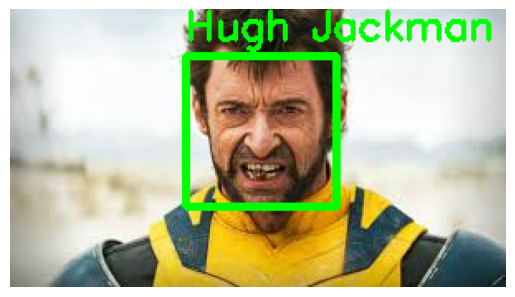

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load trained model and class names
model = tf.keras.models.load_model("celebrity_face_classifier.h5")  # Update with your model path
classes = [
    "Angelina Jolie", "Brad Pitt", "Denzel Washington", "Hugh Jackman",
    "Jennifer Lawrence", "Johnny Depp", "Kate Winslet", "Leonardo DiCaprio",
    "Megan Fox", "Natalie Portman", "Nicole Kidman", "Robert Downey Jr.",
    "Will Smith", "Scarlett Johansson", "Tom Cruise", "Tom Hanks", "Hugh Jackman"
]

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

def predict_face(image_path):
    # Load and preprocess image
    img = cv2.imread(image_path)

    # Check if the image was loaded correctly
    if img is None:
        print(f"Error: Could not load image at path: {image_path}")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print("No face detected!")
        return

    for (x, y, w, h) in faces:
        # Extract face region
        face_roi = img[y:y+h, x:x+w]

        # Resize to match model input size
        face_resized = cv2.resize(face_roi, (128, 128))
        face_array = np.expand_dims(face_resized, axis=0)  # Add batch dimension
        face_array = preprocess_input(face_array)  # Normalize like training images

        # Extract features using VGG16
        feature_extractor = tf.keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
        feature_extractor.trainable = False
        features = feature_extractor.predict(face_array)
        features = features.reshape(1, -1)

        # Predict class
        prediction = model.predict(features)
        predicted_class = np.argmax(prediction)

        # Safety check to avoid index errors
        if predicted_class < len(classes):
            class_name = classes[predicted_class]
        else:
            class_name = "Unknown"

        # Draw rectangle and label
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
        cv2.putText(img, class_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # Show image with prediction
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Test with a sample image
# ✅ Call the predict_face function with the image path
predict_face("images.jpg")  # Update with your test image path